In [40]:
#dependencies
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats


In [41]:
#clean the df
new_df = pd.read_csv('awards_with_imdb.csv')
del new_df['Unnamed: 0']
new_df = new_df.drop_duplicates(['person', 'race_ethnicity', 'sexual_orientation',
       'year_of_award', 'movie', 'award', 'birthplace', 'date_of_birth',
       'Movie Rating', 'imdbIDs', 'Movie Length (min)', 'IMDB Rating'])

award_counts = new_df.groupby('movie').count()['award']
award_counts.name='award_count'
new_df = pd.merge(new_df, award_counts, on='movie')
new_df = new_df.dropna(how='any')

7.813043478260871
7.555307262569838


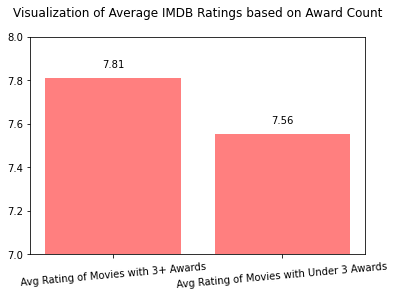

In [90]:
imdb_avgrating_3andover = new_df[new_df['award_count'] >= 3].mean()['IMDB Rating']
imdb_avgrating_under3 = new_df[new_df['award_count'] < 3].mean()['IMDB Rating']
movies_with3_ormore = new_df[new_df['award_count'] >= 3]
movies_lessthan_3 = new_df[new_df['award_count'] < 3]
data1 = movies_with3_ormore['IMDB Rating']
data2 = movies_lessthan_3['IMDB Rating']
data2 = data2.dropna(how='any')
print(imdb_avgrating_3andover)
print(imdb_avgrating_under3)
average_list = [imdb_avgrating_3andover, imdb_avgrating_under3]
averages = {'Averages': average_list}

averages_df = pd.DataFrame(averages)

#Make a graph to show the averages for presentation


labels = ['Avg Rating of Movies with 3+ Awards', 'Avg Rating of Movies with Under 3 Awards']
values = averages_df['Averages']
x_axis = np.arange(len(x_data))
plt.bar(labels, values, color='r', alpha=.5, align='center')
plt.xticks(rotation=5)
plt.ylim(7, 8)
plt.title('Visualization of Average IMDB Ratings based on Award Count', pad=20)
plt.annotate(round(imdb_avgrating_3andover, 2),
             (0, imdb_avgrating_3andover),
             ha='center',
             xytext=(0,10),
             textcoords='offset points')

plt.annotate(round(imdb_avgrating_under3, 2),
             (1, imdb_avgrating_under3),
             ha='center',
             xytext=(0,10),
             textcoords='offset points')

plt.savefig('Visualization of Average IMDB Ratings based on Award Count.png')

#### Hypotheses
- Null Hypothesis: Movies with less than 3 awards will have the same imdb rating or better. 
- Alternate Hypothesis: Movies with 3 or more awards will have a higher average imdb rating.



#### Results
- Movies with 3 or more awards had an average IMDB Rating which was statistically different from movies with less than 3 awards. With a pvalue of 2.46*e-05, IMDB Rating could be a signal of whether a movie could win 3 or more awards. 

In [43]:
#independent T-test of both means above
stats.ttest_ind(data1, data2, equal_var=False)

Ttest_indResult(statistic=4.4489638920815695, pvalue=2.458881595227183e-05)

In [44]:
#split up movie length col
movie_lengths = new_df['Movie Length (min)'].str.split(expand=True)
movie_lengths = movie_lengths[0].astype(str).astype(int)
movie_lengths
new_df['movie_length'] = movie_lengths

132.89583333333334
121.77307692307693


,Movies Length Averages
0,132.895833
1,121.773077


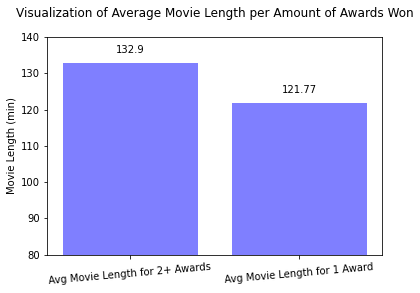

In [85]:
#look at means of movies and movie lengths
new_df
movie_length_over3 = new_df[new_df['award_count'] >= 2].mean()['movie_length']
movie_length_under3 = new_df[new_df['award_count'] < 2].mean()['movie_length']
new_df
print(movie_length_over3)
print(movie_length_under3)
#movie data into variables for Independent T-Test
movie_data1 = new_df[new_df['award_count'] >= 2]['movie_length']
movie_data2 = new_df[new_df['award_count'] < 2]['movie_length']
#visualize the averages in a bar graph and save as png
movie_length_data = [movie_length_over3, movie_length_under3]
m_length_dict = {'Movies Length Averages': movie_length_data}
m_length_df = pd.DataFrame(m_length_dict)
values = m_length_df['Movies Length Averages']
labels = ['Avg Movie Length for 2+ Awards',
         'Avg Movie Length for 1 Award']
plt.bar(labels, values, color='b', alpha=.5, align='center')
plt.xticks(rotation=5)
plt.title('Visualization of Average Movie Length per Amount of Awards Won', pad=20)
plt.ylabel('Movie Length (min)')
plt.ylim(80, 140)
plt.annotate(round(movie_length_over3, 2),
             (0, movie_length_over3),
             ha='center',
             xytext=(0,10),
             textcoords='offset points')

plt.annotate(round(movie_length_under3, 2),
             (1, movie_length_under3),
             ha='center',
             xytext=(0,10),
             textcoords='offset points')



plt.savefig('Visualization of Average Movie Length per Amount of Awards won.png')
m_length_df


In [41]:
#independent T-test of both means above
stats.ttest_ind(movie_data1, movie_data2, equal_var=False)

Ttest_indResult(statistic=3.693798184716723, pvalue=0.00026920081759221483)

#### Hypotheses
- Null Hypothesis: Movies with 2 or more awards will not have longer movie lengths, meaning movie lengths is not a factor in movie awards.

- Alternate Hypothesis: Movies with 2 or more awards will have longer movie lengths, meaning movie lengths is a factor in movie awards.

#### Results
- Movies with 2 or more awards had an average movie length of 133 min, over 10 min longer than movies with only 1 award.A pvalue of .00026 signals that these averages were significantly different from one another. Meaning movie length could have an effect on amount of awards won.


In [42]:
new_df

,_unit_id,person,race_ethnicity,sexual_orientation,year_of_award,movie,award,birthplace,date_of_birth,Movie Rating,imdbIDs,Movie Length (min),IMDB Rating,award_count,movie_length
0,670454353,Lewis Milestone,White,Straight,1927,Two Arabian Knights,Best Director,"Chisinau, Moldova",30-Sep-1895,TV-G,tt0018515,92 min,6.7,1,92
1,670454354,Frank Lloyd,White,Straight,1930,The Divine Lady,Best Director,"Glasgow, Scotland",2-Feb-1886,Not Rated,tt0019824,99 min,6.2,1,99
2,670454355,Lewis Milestone,White,Straight,1931,All Quiet on the Western Front,Best Director,"Chisinau, Moldova",30-Sep-1895,Passed,tt0020629,152 min,8.0,1,152
4,670454357,Frank Borzage,White,Straight,1933,Bad Girl,Best Director,"Salt Lake City, Ut",23-Apr-1894,Passed,tt0021635,90 min,6.5,1,90
5,670454358,Frank Lloyd,White,Straight,1934,Cavalcade,Best Director,"Glasgow, Scotland",2-Feb-1886,Passed,tt0023876,112 min,5.8,1,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,670454762,Tilda Swinton,White,Straight,2007,Michael Clayton,Best Supporting Actress,"London, England",5-Nov-60,R,tt0465538,119 min,7.2,1,119
411,670454763,Penelope Cruz,Hispanic,Straight,2009,Vicky Cristina Barcelona,Best Supporting Actress,"Madrid, Spain",28-Apr-74,PG-13,tt0497465,96 min,7.1,1,96
412,670454764,Mo'Nique,Black,Straight,2010,Precious,Best Supporting Actress,"Woodlawn, Md",11-Dec-67,R,tt0929632,110 min,7.3,1,110
413,670454766,Octavia Spencer,Black,Na,2012,The Help,Best Supporting Actress,"Montgomery, Al",25-May-72,PG-13,tt1454029,146 min,8.0,1,146
